# Lab 04 - Clustering


## 1 - Introduction

The goal of this workshop is to show the main principles of Clustering, in an interactive and
educational context. We will talk about Clustering basic definitions, Clustering algorithms and methods to evaluate their performance.
Each section contains questions and small exercises to grasp better each of the explained concepts.

### Supervised Learning VS Unsupervised Learning
***Machine Learning*** is a field of Artificial Intelligence used to make systems learn a specific behaviour (classification, regression, etc...) starting from data. To do so, data can be "labeled" - associated to some extra information like a numerical value or a category - and the involved algorithm is required to learn a mapping from each data input to these labels, an approach called ***Supervised Learning***.
However, sometimes labels are not available, or we want to have insights on the known data rather than getting predictions. ***Unsupervised Learning*** algorithms come in help, since they can learn patterns from unlabeled data, without needing any extra information

### Unsupervised Learning: use cases
Unsupervised Learning can be used in several scenarios:
   - *customer segmentation*: dividing customers in groups based on purchase history/browsing patterns (without knowing the number of customer types)
   - *anomaly detection*: revealing data points which deviate significantly from the others
   - *document categorization*: organizing text documents into categories based on content similarity

### Clustering
***Clustering*** is a type of Unsupervised Learning which consists in finding groups of data objects, called *clusters*, such that elements within the same cluster are similar/related to one another and are different to the ones belonging to other clusters. Actually, the definition of cluster can vary based on the type of algorithm used; some examples:
- ***center-based*** $\rightarrow$ a cluster is the set of objects closest to its center; the center can be defined in several ways, for example as the *centroid* - the average of the points within the relative cluster
    $$
        \bar{c_i} = (\bar{c_{i1}}, \bar{c_{i2}}, ..., \bar{c_{in}}) ,\quad \bar{c_{ij}} = \frac{1}{n}\sum\limits_{k=1}^{n}x_{kj}
    $$
    Where $\bar{c_{ij}}$ is the j-th component of the cluster i's centroid, and $x_{kj}$ is the j-th component of the k-th point of the cluster i
- ***density-based*** $\rightarrow$ a cluster is a high-density region of points; the separation among clusters is represented by low-density regions

<p align="center">
  <img src="./images/typesOfClusters.png" alt="centerBasedVsDistanceBased" width=700 />
</p>


## 2 - Loading and preparing the Data

To apply clustering algorithms, we first need to choose a ***dataset*** - a structured collection of data usually organized in a tabular format. In this case:
- each row corresponds to an element of the dataset called *data point* (a flower, a person, a document etc...)
- each column corresponds to a *feature* of that data point (age or height for a person, word count for a document etc...); there can be an extra column representing the *class*, that is the category each data point belongs to (but for clustering we don't need it!)

In Python, such two-dimensional table-like structure can be represented with a *DataFrame*, a class coming from the *Pandas* library.

[pandas.DataFrame documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) |
[10 minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)

<p align="center">
  <img src="./images/dataFrame.png" alt="DataFrame" />
</p>

In [3]:
# import dependencies
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The chosen dataset is called Iris. ***Iris*** is a pretty small and common dataset containing the description about the types of iris plant. The dataset is made of 3 equally distributed classes, with information about sepal and petal width/length.
### Loading the dataset

To load the Iris dataset we can exploit the ***Scikit-Learn*** library and in particular the <code>[load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)</code> method: this method easily gets the dataset as a DataFrame (with the option ```as_frame = True```). The returned object contains:
- *data* $\rightarrow$ DataFrame with only feature columns
- *target* $\rightarrow$ Series (one dimensional array holding data of any type) with only the target (class) column
- *frame* $\rightarrow$ DataFrame combining *data* and *target*
- *feature_names* $\rightarrow$ list of the features' names
- *target_names* $\rightarrow$ list of the classes' names

Scikit-Learn is fundamental for this lab, since it provides support not only for dataset loading, but also for classification, preprocessing, model evaluation, clustering and much more.

[Scikit-Learn](https://scikit-learn.org/stable/)

In [4]:
# load the dataset
iris = load_iris(as_frame=True)
# create a DataFrame with only features (no target)
iris_df = iris.data

print("Iris.data is of type {}".format(type(iris.data)))
print("Iris.frame is of type {}".format(type(iris.frame)))
print("Iris target: ")
print(iris.target)
print("Iris class names: {}".format(iris.target_names))
print("Iris feature names: {}".format(iris.feature_names))


Iris.data is of type <class 'pandas.core.frame.DataFrame'>
Iris.frame is of type <class 'pandas.core.frame.DataFrame'>
Iris target: 
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64
Iris class names: ['setosa' 'versicolor' 'virginica']
Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Initial feature visualization and distributions
Visualizing the features is fundamental not only to have a general understanding of how the dataset is structured, but also to check if some preprocessing is required or not before applying clustering methods.

The <code>[display()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame.style.display)</code> method can be used to render a DataFrame object, with rows representing the entries of the dataset and the columns representing the features.

The <code>[describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)</code> method of a DataFrame object is a statistics function containing a lot of useful information, like:
- *count*: number of non-null values for each column
- *mean*: mean of the values in each column
- *std*: standard deviation of the values in each column

The method <code>[value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts)</code> returns counts for each unique value of the Series object; it can be used to check the number of samples per class, which can give insights about the dataset distribution.

In [5]:
# feature visualization
display(iris_df)
display(iris_df.describe().T)

class_distribution = iris.target.value_counts()
print(class_distribution)

distr_df = pd.DataFrame({
    'Class_name': iris.target_names,
    'class_count': class_distribution.values,
})

display(distr_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


target
0    50
1    50
2    50
Name: count, dtype: int64


,Class_name,class_count
0,setosa,50
1,versicolor,50
2,virginica,50


To further analyze the data distribution we can plot histograms, for single-feature distributions, and pairplots, for pairwise-feature distributions:
#### ***Histogram***

<p align="center">
    <img src="./images/histogram.png" alt="Alt text" width="700"/>
</p>

A histogram is a graphical representation of the distribution of a single numerical variable. On the x-axis there is the range of values that variable can take, divided in contiguous intervals or ***bins***; on the y-axis there is, for each bin, the number of times the variable took a value inside the bin's range (it can be both raw counts or expressed as a probability density between 0 and 1). It's useful to understand what is the distribution of each feature of our dataset, a crucial information for feature scaling (we'll see this later...)

#### ***Pairplot***

<p align="center">
  <img src="./images/pairplot.png" alt="pairplot" />
</p>

A pairplot is similar to a histogram, but instead of representing the distribution of a single feature, it represents all possible pair-wise feature distributions. In particular, for a dataset of $p$ numerical features, its pairplot will be a $p x p$ grid such that:
- *cell(i,j)* is a scatterplot showing the distribution of feature $i$ against the one of feature $j$
- *cell(i,i)* is a histogram showing the distribution of feature $i$

Pairplots are very important for clustering: they give us an idea of how are features correlated and which have the largest variability, an element that determines how spread our clusters will be (again we'll see this later...)

In python, histograms and pairplots can be created using methods from Pandas and Seaborn libraries:
- histogram $\rightarrow$ <code>[DataFrame.hist()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html#pandas.DataFrame.hist)</code>, specifying the number of bins ("bars" of the histogram)
- pairplot $\rightarrow$ <code>[Seaborn.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html)</code>

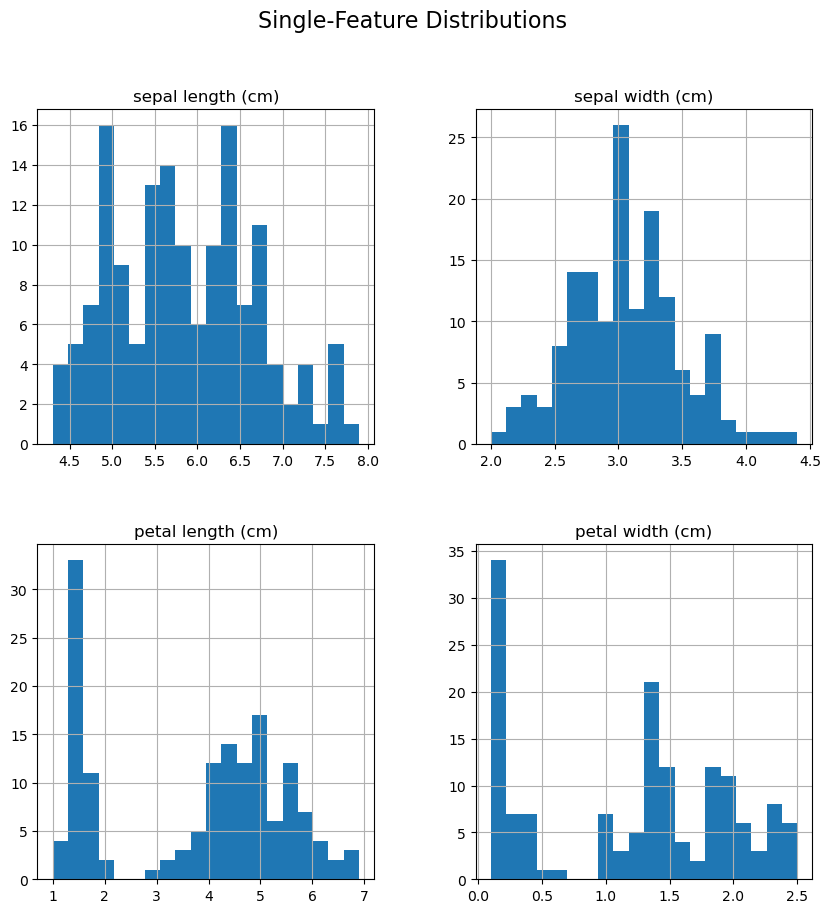

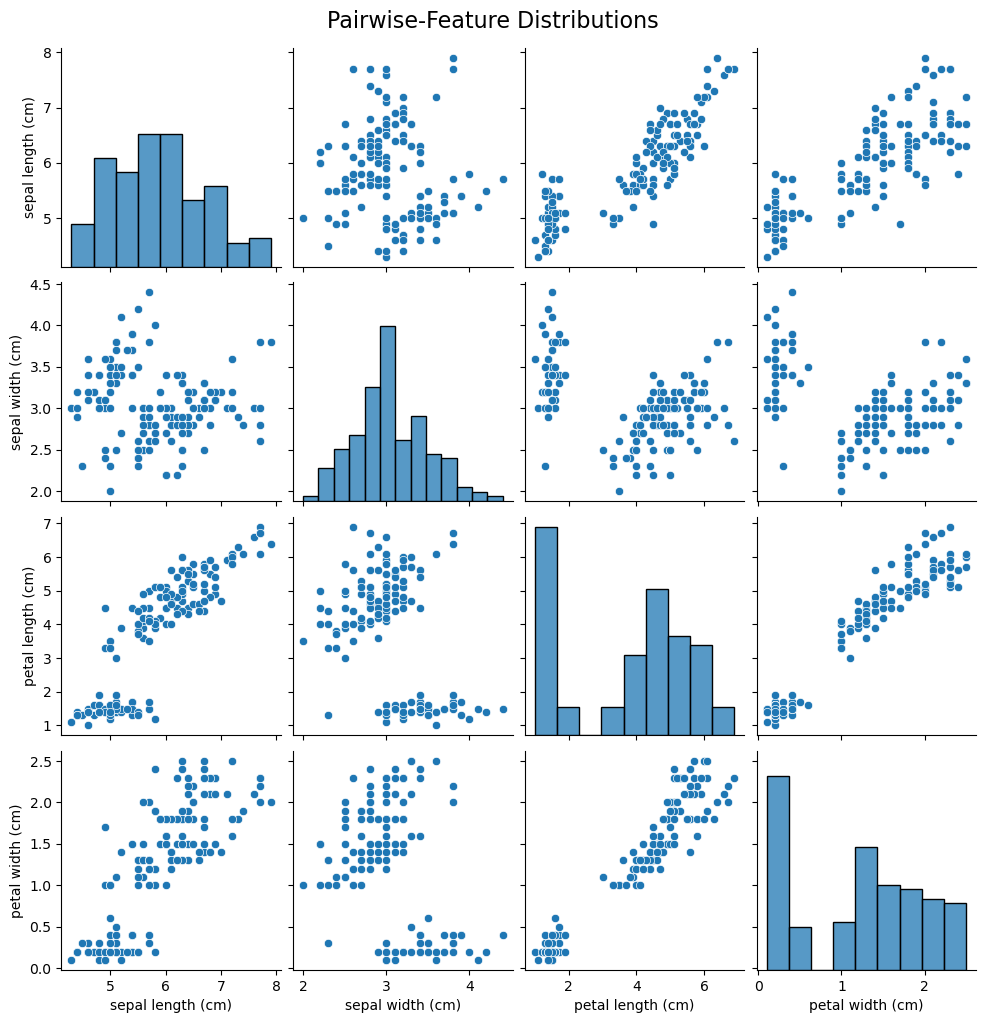

In [6]:
iris_df.hist(bins=20, figsize=(10, 10))
plt.suptitle("Single-Feature Distributions", fontsize=16)
plt.show()

# pairplot
sns.pairplot(iris_df)
plt.suptitle("Pairwise-Feature Distributions", fontsize=16, y=1.02)
plt.show()


### The importance of Feature Scaling
Distance-based clusters are sensitive to feature value ranges (distance can be "dominated" by the presence of high values). That's why it's important to scale features before using any clustering algorithm. Since from the previous plots we observe a pseudo-normal trend in almost each feature, we can use <code>[sklearn.preprocessing.StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)</code> class, so that each feature follows a Standard Normal distribution, with mean $\mu$ equal to 0 and standard deviation $\sigma$ equal to 1:

$$
x_{scaled} = \frac{x - \mu}{\sigma}
$$

Other possible approaches involve constraining each feature to a fixed range [$min$, $max$]:

$$
x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}} * (max - min) + min
$$
where $x_{min}$ and $x_{max}$ are respectively the minimum and maximum value for that feature. In python, we can obtain this result by using <code>[sklearn.preprocessing.MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)</code>.

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scale the features
scaler = MinMaxScaler(feature_range=(-1, 1)) # by default the feature range is (0, 1)
iris_scaled_df = scaler.fit_transform(iris_df)
iris_scaled_df = pd.DataFrame(data=iris_scaled_df, columns=iris.feature_names)

print("Scaled with MinMaxScaler:")
display(iris_scaled_df.describe().T[['mean', 'std', 'min', 'max']])

# features follow gaussian-like distributions, so we'll stick with StandardScaler()
scaler = StandardScaler()
iris_scaled_df = scaler.fit_transform(iris_df)
iris_scaled_df = pd.DataFrame(data=iris_scaled_df, columns=iris.feature_names)

print("Scaled with StandardScaler:")
display(iris_scaled_df.describe().T[['mean', 'std', 'min', 'max']])

Scaled with MinMaxScaler:


,mean,std,min,max
sepal length (cm),-0.142593,0.460037,-1.0,1.0
sepal width (cm),-0.118889,0.363222,-1.0,1.0
petal length (cm),-0.065085,0.598406,-1.0,1.0
petal width (cm),-0.083889,0.635198,-1.0,1.0


Scaled with StandardScaler:


,mean,std,min,max
sepal length (cm),-4.736952e-16,1.00335,-1.870024,2.492019
sepal width (cm),-7.815970e-16,1.00335,-2.433947,3.090775
petal length (cm),-4.263256e-16,1.00335,-1.567576,1.785832
petal width (cm),-4.736952e-16,1.00335,-1.447076,1.712096


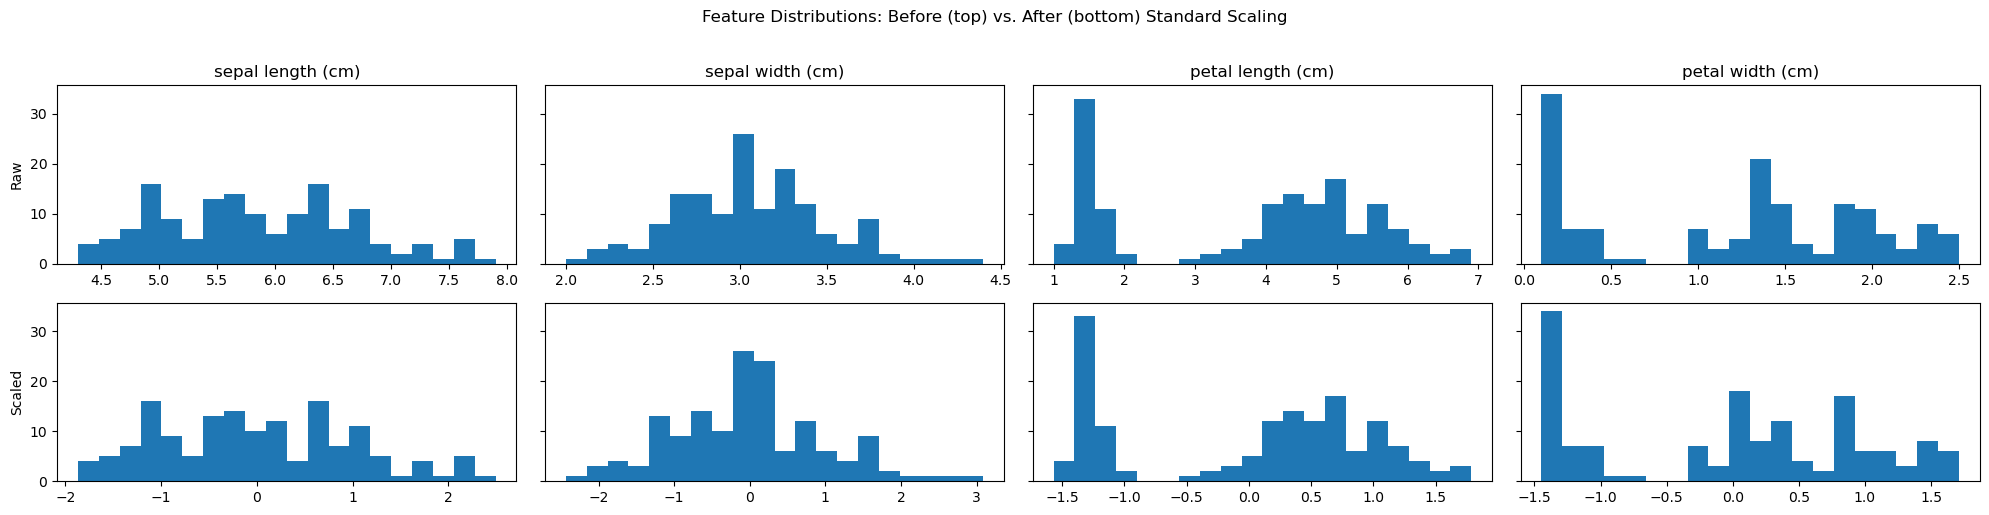

In [8]:
fig, axes = plt.subplots(2, len(iris_df.columns), figsize=(20, 5), sharey='row')

# raw histograms
for i, col in enumerate(iris_df.columns):
    axes[0, i].hist(iris_df[col], bins=20)
    axes[0, i].set_title(col)
    if i==0:
        axes[0, i].set_ylabel('Raw')

# scaled histograms
for i, col in enumerate(iris_scaled_df.columns):
    axes[1, i].hist(iris_scaled_df[col], bins=20)
    if i==0:
        axes[1, i].set_ylabel('Scaled')

fig.suptitle("Feature Distributions: Before (top) vs. After (bottom) Standard Scaling", y=1.02)
plt.tight_layout()
plt.show()

### 💡 ***Exercise: comparison between scaled and unscaled data on the Wine Dataset***

The Iris dataset is pretty common in machine learning, but it's not ideal to show the impact of scaling (there isn't enough diversity in the features' scales)

In [9]:
display(iris_df.describe().T[['mean', 'std', 'min', 'max']])

,mean,std,min,max
sepal length (cm),5.843333,0.828066,4.3,7.9
sepal width (cm),3.057333,0.435866,2.0,4.4
petal length (cm),3.758000,1.765298,1.0,6.9
petal width (cm),1.199333,0.762238,0.1,2.5


The Wine dataset, instead, has 13 features describing the chemical properties of three wine cultivars coming from the same region in Italy. Some of these features are significantly different in scale

In [10]:
from sklearn.datasets import load_wine

# load wine dataset
wine_df = load_wine(as_frame=True)
wine_target = wine_df.target
wine_df = wine_df.data

display(wine_df.describe().T[['mean', 'std', 'min', 'max']])

,mean,std,min,max
alcohol,13.000618,0.811827,11.03,14.83
malic_acid,2.336348,1.117146,0.74,5.80
ash,2.366517,0.274344,1.36,3.23
alcalinity_of_ash,19.494944,3.339564,10.60,30.00
magnesium,99.741573,14.282484,70.00,162.00
total_phenols,2.295112,0.625851,0.98,3.88
flavanoids,2.029270,0.998859,0.34,5.08
nonflavanoid_phenols,0.361854,0.124453,0.13,0.66
proanthocyanins,1.590899,0.572359,0.41,3.58
color_intensity,5.058090,2.318286,1.28,13.00


In this exercise we demonstrate the effect of feature scaling by computing the Euclidean distance from a query point to two other points sampled from the Wine dataset, both before and after scaling. We'll see that the query's nearest neighbor changes after switching from the unscaled to the scaled setup, proving that without scaling high range features are implicitly treated as more important than low range ones.
The Euclidean distance between two points is defined as the norm of the difference between those points:
$$
d(x,y) = || x - y ||_2 = \sum\limits_{i = 1}^n (x_i - y_i)^2
$$

In Python, the Euclidean distance can be easily computed using <code>[numpy.linalg.norm documentation](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.norm.html)</code>.
To get a sample given its index in the dataset, we can instead use <code>[DataFrame.iloc[] documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)</code>, by specifying the ```index``` term; note that we can also get more samples together by replacing the single index with the list of indexes corresponding to the desired data points, and in particular we can use <code>[DataFrame.iloc[] documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)</code> by specifying the ```list_of_indexes``` term.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


Before scaling: 
d_AB = 31.2650123940484, d_AC = 35.27497696668277
Nearest neighbor to A: B 



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.095423,0.513134,1.264724,0.613139,1.411516,-0.074125,0.419832,1.069045,1.168975,-0.091806,0.392232,1.357553,1.372813
1,-1.322332,0.884713,-1.180409,-1.410220,-0.630141,-1.185999,-1.379448,0.267261,-1.273779,-1.176259,0.980581,-1.021978,-0.392232
2,0.226909,-1.397847,-0.084315,0.797081,-0.781375,1.260124,0.959616,-1.336306,0.104805,1.268064,-1.372813,-0.335575,-0.980581


After scaling: 
d_AB = 6.450422595379692, d_AC = 5.781712902205751
Nearest neighbor to A: C


,Unscaled,Scaled
alcohol,1.03,2.417755
malic_acid,0.07,0.371580
ash,0.29,2.445133
alcalinity_of_ash,4.40,2.023360
magnesium,27.00,2.041656
total_phenols,0.15,1.111874
flavanoids,0.30,1.799280
nonflavanoid_phenols,0.02,0.801784
proanthocyanins,1.01,2.442754
color_intensity,1.26,1.084453


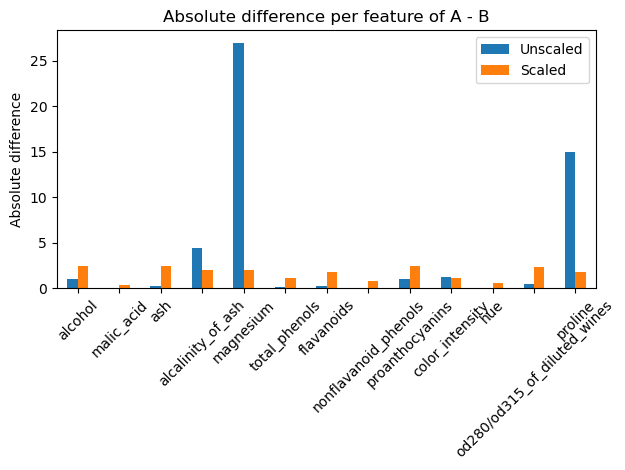

,Unscaled,Scaled
alcohol,0.37,0.868514
malic_acid,0.36,1.910981
ash,0.16,1.349039
alcalinity_of_ash,0.40,0.183942
magnesium,29.00,2.192890
total_phenols,0.18,1.334249
flavanoids,0.09,0.539784
nonflavanoid_phenols,0.06,2.405351
proanthocyanins,0.44,1.064170
color_intensity,1.58,1.359870


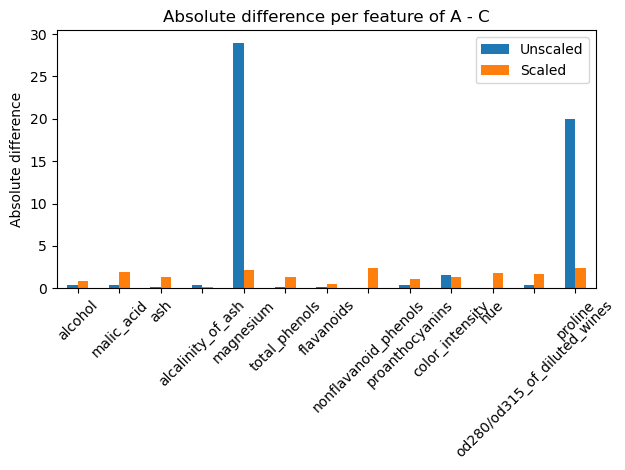

In [11]:
import numpy as np

# sample three points (A, B, C) from the wine dataset
indexes = [0, 1, 9]
samples = wine_df.iloc[indexes]
display(samples)

# compute the Euclidean distance between A and B, and between A and C
d_AB = np.linalg.norm(samples.iloc[0] - samples.iloc[1])
d_AC = np.linalg.norm(samples.iloc[0] - samples.iloc[2])
print("Before scaling: ")
print("d_AB = {}, d_AC = {}".format(d_AB, d_AC))
print("Nearest neighbor to A: {} \n".format("B" if d_AB < d_AC else "C"))

scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)
scaled_samples_df = pd.DataFrame(data=scaled_samples, columns=wine_df.columns)
display(scaled_samples_df)

d_AB = np.linalg.norm(scaled_samples_df.iloc[0] - scaled_samples_df.iloc[1])
d_AC = np.linalg.norm(scaled_samples_df.iloc[0] - scaled_samples_df.iloc[2])
print("After scaling: ")
print("d_AB = {}, d_AC = {}".format(d_AB, d_AC))
print("Nearest neighbor to A: {}".format("B" if d_AB < d_AC else "C"))

# plot the absolute differences per feature to further see the implicit importance of unscaled high-range features
abs_diff_AB = abs(samples.iloc[0] - samples.iloc[1])
abs_diff_AB_scaled = abs(scaled_samples_df.iloc[0] - scaled_samples_df.iloc[1])

abs_diff_AB_df = pd.DataFrame(
    np.array([abs_diff_AB, abs_diff_AB_scaled]).T,
    columns = ["Unscaled", "Scaled"],
    index = wine_df.columns
)

display(abs_diff_AB_df)

abs_diff_AB_df.plot(kind="bar")
plt.title("Absolute difference per feature of A - B")
plt.ylabel("Absolute difference")
# rotate x-axis labels for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

abs_diff_AC = abs(samples.iloc[0] - samples.iloc[2])
abs_diff_AC_scaled = abs(scaled_samples_df.iloc[0] - scaled_samples_df.iloc[2])

abs_diff_AC_df = pd.DataFrame(
    np.array([abs_diff_AC, abs_diff_AC_scaled]).T,
    columns = ["Unscaled", "Scaled"],
    index = wine_df.columns
)

display(abs_diff_AC_df)

abs_diff_AC_df.plot(kind="bar")
plt.title("Absolute difference per feature of A - C")
plt.ylabel("Absolute difference")
# rotate x-axis labels for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 3 - Exploring the Data Structure

So far we've seen how to visualize the single features of the Iris dataset, which can be useful to understand correlations and distributions. However, detecting broader patterns and potential clusters is much harder, since the dataset lies in a 4-dimensional space. This is where **Dimensionality reduction** methods come in help: with them, it's possible to "squeeze" the data structure into a 2-dimensional space, while preserving (as much as possible) the relationships between data points.

### PCA (Principal Component Analysis)
1) finds the directions along which data varies the most (*principal components*); each direction is a vector computed as a linear combination of each feature, with each coefficient representing the impact of the feature on that direction;
2) projects data points onto the first two of these components, obtaining a 2D representation tha captures the most important variability patterns in the dataset;

<p align="center">
  <img src="./images/PCA_original.png" alt="PCA" />
</p>

In Python, we can use the <code>[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)</code> class to initialize a PCA object specifying the number of principal components we want to project the data points on (```n_components```); then, the reduced dataset can be obtained by passing it (as a DataFrame object) to <code>[PCA().fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform)</code>. We can also visualize the principal components (<code>[PCA().components_](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.components_)</code>) using the <code>[matplotlib.pyplot.arrow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html#matplotlib.pyplot.arrow)</code> method from Matplotlib. Note that, since PCA is represented in a 2D space, we cannot directly plot the principal components (they are 4D vectors in the original feature space); instead, we can plot the directions of variability for each feature of the dataset.

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


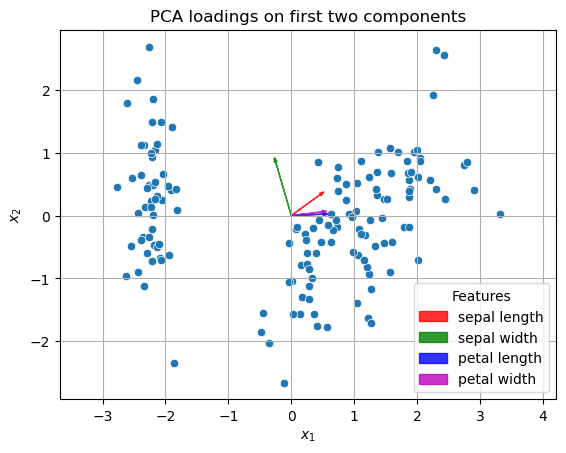

In [12]:
from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt (already imported before)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled_df)
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1])

pca_comp = pca.components_
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
colors = ['r', 'g', 'b', 'm']
print(pca_comp)
for i, (f, c) in enumerate(zip(features, colors)):
    plt.arrow(0, 0, pca_comp[0, i], pca_comp[1, i], color=c, alpha=0.8, head_width=0.05, length_includes_head=True, label=f)

plt.title("PCA loadings on first two components")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(title="Features", loc="best")
plt.grid(True)
plt.axis('equal')
plt.show()

#### ***Why does this work?***
Variability is related to ***informativity***: the more the data points are spread out, the higher will be the number of patterns they contain. If the reduced representation is able to capture most of the variability in the original dataset, (e.g.: it "explains the variance" sufficiently) it can capture well the underlying information; as a result, it can preserve the original structures and relationships among data points.
#### ***How do we know if two components are enough to capture most of the variability?***
We can check <code>(PCA().explained_variance_)</code>, which returns the percentage of variance captured by a principal component, for each of the components. As we can see from the example below, two components can explain most of the variance in the dataset (96% of it):


In [13]:
pca = PCA(n_components=4)
pca.fit(iris_scaled_df)
evr = pd.Series(pca.explained_variance_ratio_,
                index=[f"PC{i+1}" for i in range(4)])
print(evr.round(3))
print("Percentage of variance captured by the first two components: {}".format(evr.iloc[0].round(3) + evr.iloc[1].round(3)))

PC1    0.730
PC2    0.229
PC3    0.037
PC4    0.005
dtype: float64
Percentage of variance captured by the first two components: 0.959


#### ***PCA and Pairplots***
If we compare the (petal length, sepal width) pairplot of the iris dataset, we can notice a lot of similarities with the previous PCA plot. This means that most of the variability patterns come from those two features, which have also the highest ***loading*** (weight/coefficient of the principal components) among all the other features. This last detail can be easily seen by creating a DataFrame containing loadings (<code>[PCA().components_](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.components_)</code>) and plotting them as bars with <code>[DataFrame.plot(kind="bar")](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)</code>. 

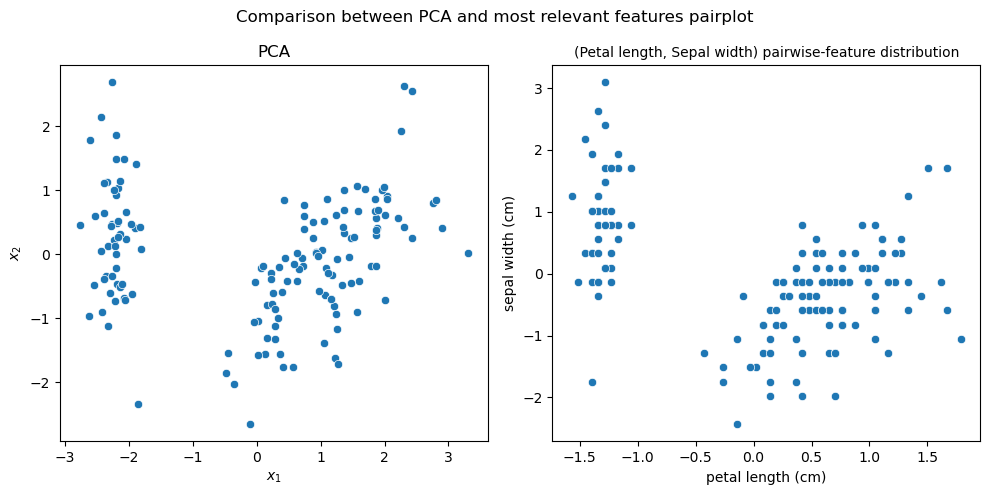

,PC1,PC2
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


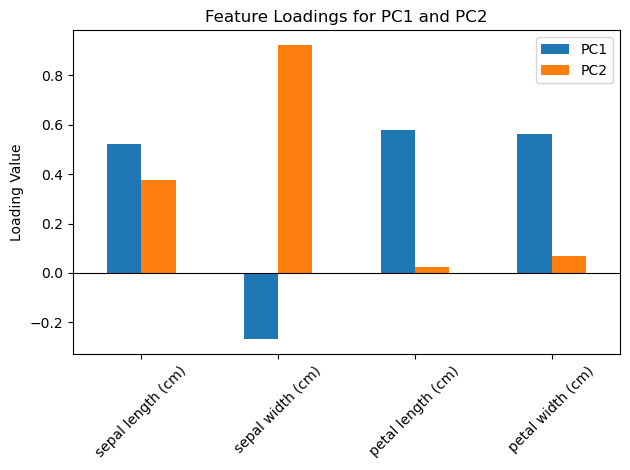

Most relevant loading for PC1: petal length (cm) (0.5804130957962942)
Most relevant loading for PC2: sepal width (cm) (0.9232956595407145)


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled_df)
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], ax=axes[0])
axes[0].set_title("PCA")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$x_2$")

sns.scatterplot(iris_scaled_df, x="petal length (cm)", y="sepal width (cm)", ax=axes[1])
axes[1].set_title("(Petal length, Sepal width) pairwise-feature distribution", fontsize=10)
axes[1].set_xlabel("petal length (cm)")
axes[1].set_ylabel("sepal width (cm)")

plt.suptitle("Comparison between PCA and most relevant features pairplot")
plt.tight_layout()
plt.show()


loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=iris_scaled_df.columns
)
display(loadings_df)

loadings_df.plot(kind="bar")
plt.title("Feature Loadings for PC1 and PC2")
plt.ylabel("Loading Value")
plt.xticks(rotation=45)
plt.axhline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()

print("Most relevant loading for PC1: {} ({})".format(loadings_df["PC1"].idxmax(), max(loadings_df["PC1"])))
print("Most relevant loading for PC2: {} ({})".format(loadings_df["PC2"].idxmax(), max(loadings_df["PC2"])))

### t-SNE (t-Stochastic Neighbor Embedding)
PCA is a fast and reliable dimensionality reduction technique, but it can struggle with datasets containing highly non-linear patterns. For these scenarios we can instead use ***t-SNE (t-Stochastic Neighbor Embedding)***, which can better capture non-linearities.
while PCA focuses on preserving global structures, t-SNE focuses on preserving local neighborhoods among data points. In particular:
1) for each point, builds a Gaussian conditional probability distribution in the original feature space based on the distances between points: closer points will have a high probability, distant points will have a low probability. The number of points to be considered "close" is specified with a hyperparameter called ***perplexity***

<p align="center">
  <img src="./images/tsneVisual.png" alt="TSNEexplained" />
</p>

2) in the reduced (2D) feature space creates a Student-t distribution, which has "heavier tails" with respect to a Gaussian one: letting significantly distant points have a non-negligible probability in the low dimensional space avoids having these points squeezed close together, a common scenario that happens when reducing dimensions (e.g.: reducing degrees of freedom)

<p align="center">
  <img src="./images/tsneVisual2.png" alt="TSNEexplained2" />
</p>

In Python, we can proceed in a way similar to PCA: after creating a t-SNE object with <code>[sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)</code>, specifying again ```n_components=2```, the reduced dataset is obtained by passing it (as a DataFrame object) to <code>[TSNE().fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE.fit_transform)</code>.

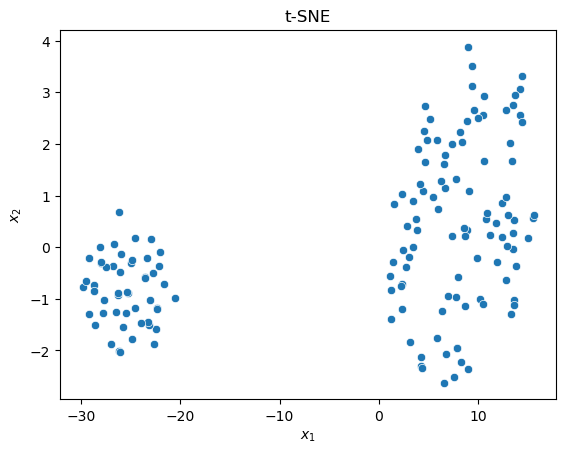

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
iris_tsne = tsne.fit_transform(iris_scaled_df)
sns.scatterplot(x=iris_tsne[:, 0], y=iris_tsne[:, 1])
plt.title("t-SNE")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()


#### ***Why does this work?***
Because it effectively shifts the dimensionality reduction problem to a probability matching task: by reconstructing a probability distribution in the reduced space that is as close as possible to the original one, we are also preserving the original structural patterns and relationships among data points (especially local neighborhoods).
### 💡 ***Exercise: the role of perplexity in t-SNE***
As briefly mentioned, ***perplexity*** represents the number of neighbors each data point considers as mostly "relevant" when constructing the probability distribution in the high-dimensional space. Since it's a t-SNE hyperparameter, it can be tuned to obtain different results:
- low perplexity (5 - 30) $\rightarrow$ few points are important, so local structures/clusters are well preserved
- high perplexity (30 - 50) $\rightarrow$ a lot of points are important, so global structures are preserved more; if too high, it can merge together some local clusters (***oversmooth***) or change their shape and/or position

Now, try to use t-SNE with different perplexity values (es.: 5, 30, 50, 100, 130) and see how the tradeoff between preserving local and global structures is handled.


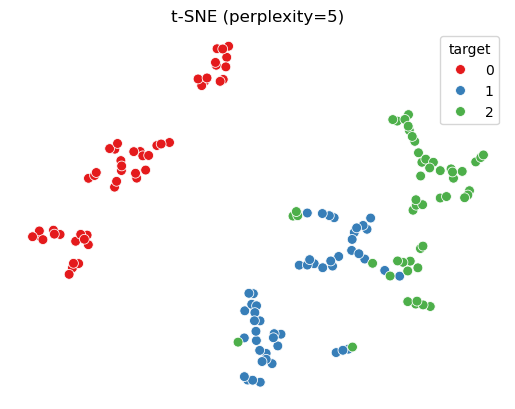

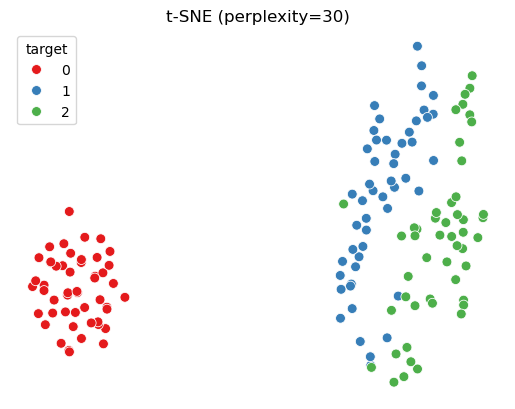

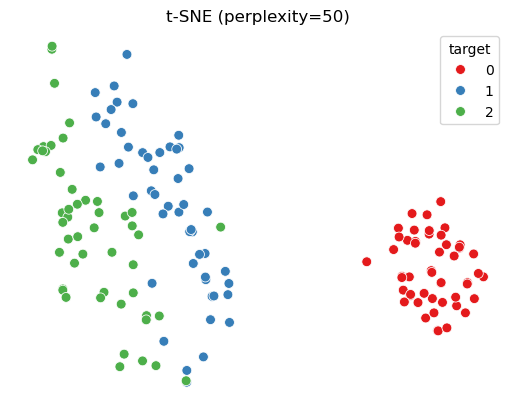

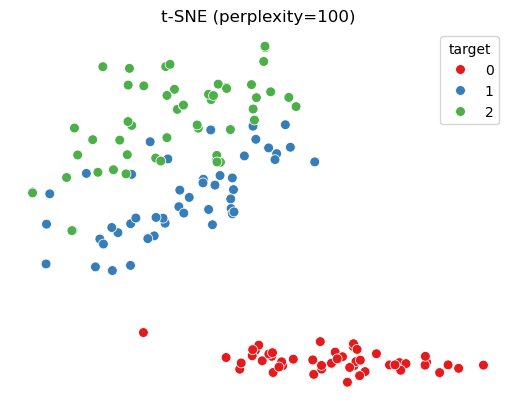

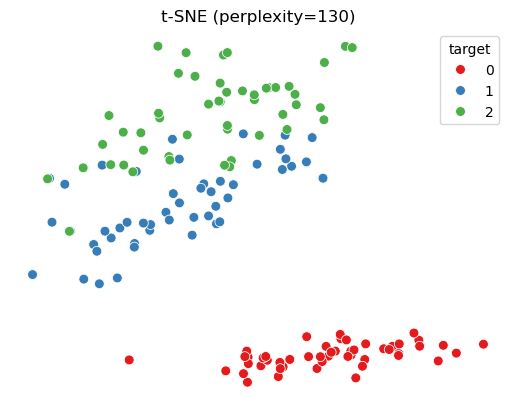

In [16]:
perplexity_values = [5, 30, 50, 100, 130]

for perp in perplexity_values:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perp)
    emb = tsne.fit_transform(iris_scaled_df)

    sns.scatterplot(x=emb[:,0], y=emb[:,1],
                    hue=iris.target, palette='Set1', s=50)
    plt.title(f"t-SNE (perplexity={perp})")
    plt.axis('off')
    plt.show()


### PCA vs t-SNE: what should you use and when?
| **Feature**            | **PCA**                                                                                                                                                                                                                        | **t-SNE**                                                                                                                                                             |
| ---------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Interpretability**   | High – Principal components are linear combinations of original features, where each coefficient (*loading*) expresses the relevance of the corresponding feature in that component. | Low – Embedding axes are arbitrary and have no direct meaning in the original feature space.                                                                          |
| **Non-linearity**      | Struggles when feature pairwise distributions are highly non-linear.                                                                                                                                                           | Excels at capturing complex, non-linear relationships (local clusters).                                                                                               |
| **Determinism**        | Deterministic – Same input → same output every time.                                                                                                                                                                           | Stochastic – Results vary with random seed, which can lead to slightly different cluster layouts each time.                                                           |
| **Computational Cost** | Low – Requires only computation of vectors and projections, making it fast even on large datasets.                                                                                                                             | High – Requires constructing two probability distributions (in high and low dimensions) and solving an optimization problem to match them.                            |
| **Best Use Cases**     | • When you need interpretable features<br>• When data is mostly linear<br>• To visualize global structures (variance)                                                                                                          | • To visualize hidden local (non-linear) structures in low-dimensional spaces<br>• When the dataset is small or after an initial PCA reduction for better performance |



## 4 - Clustering Algorithms

Now it's time to see some of the most common algorithms for clustering. In particular, we'll see:
- K-means
- DBSCAN
- Hierarchical clustering

### K-Means
It's a *partitional* clustering algorithm (divides data points in non-overlapping sets such that each point belongs exactly to one set).

**Algorithm steps:**
1) k points are randomly chosen as initial *centroids*, each of them with a relative label
2) each point receives the label corresponding to the nearest centroid
3) centroids are updated using the points with the same label; the process starts again from 2., until convergence

<p align="center">
  <img src="./images/Kmeans.png" alt="kmeans" width=800/>
</p>

The choice of $k$ is crucial: it determines how many clusters will be formed. Since we have three classes in our dataset, $k$ should be $3$.

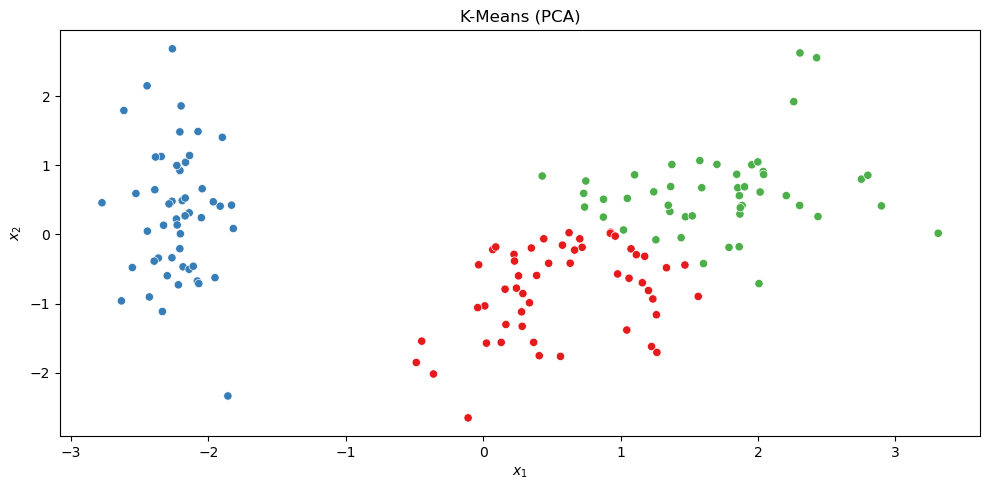

In [17]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(iris_scaled_df) # note that kmeans assigns label numbers randomly, since it does not know true labels
name = "K-Means"

fig, ax = plt.subplots(figsize=(10, 5))  

sns.scatterplot(
    x=iris_pca[:, 0], y=iris_pca[:, 1],
    hue=labels, palette="Set1", ax=ax, legend=(name == "Ground Truth")
)
ax.set_title(f"{name} (PCA)")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.tight_layout()
plt.show()


### DBSCAN
It's a density-based partitional clustering algorithm. As a density-based method, it doesn't require specifying the number of clusters ($k$ in K-means), since each of them is identified by a high density region in the feature space.

**Algorithm steps:**

0. choose two hyperparameters:
   - *min_samples* $\rightarrow$ minimum number of points to form a dense region
   - $\varepsilon$ $\rightarrow$ neighborhood radius
1. identify *core points* $\rightarrow$ points having more than *min_samples* in their $\varepsilon$-neighborhood
2. identify *border points* $\rightarrow$ points having less than *min_samples* in their $\varepsilon$-neighborhood, but in a $\varepsilon$-neighborhood of a core point
3. identify *noise points* $\rightarrow$ all other points not classified as core or border
4. for each core point, assign to it a label and do the same for all the other points (excluding noise points) in its $\varepsilon$-neighborhood

<p align="center">
  <img src="./images/DBSCAN.png" alt="dbscan" />
</p>

DBSCAN implicitly performs a noise/outlier detection, since points that are not part of a high density region are labelled with $-1$ and ignored in step 4). By tuning $\varepsilon$ and *min_samples*, we can leverage the level of sparsity and consequently the number of noise points detected

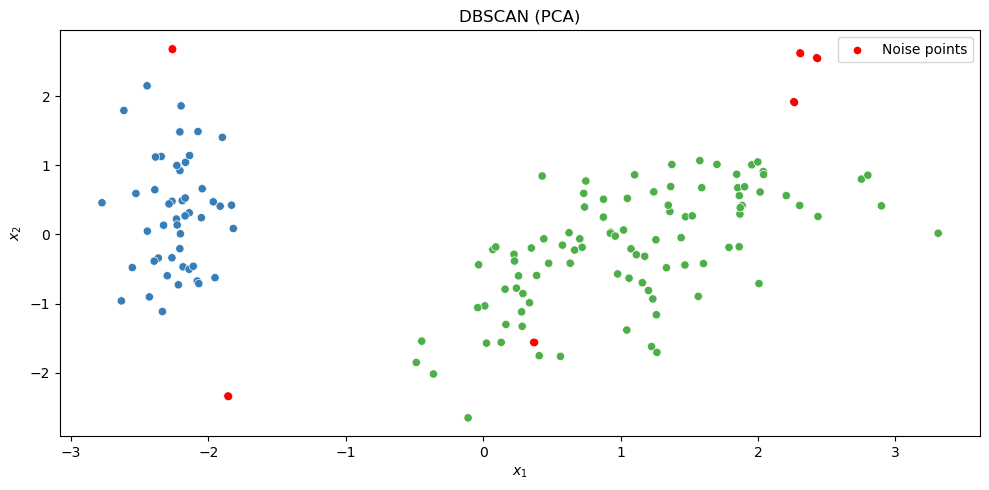

In [18]:
dbs = DBSCAN(eps=0.7, min_samples=5)
labels = dbs.fit_predict(iris_scaled_df)
name = "DBSCAN"

fig, ax = plt.subplots(figsize=(10, 5))  

sns.scatterplot(
    x=iris_pca[:, 0], y=iris_pca[:, 1],
    hue=labels, palette="Set1", ax=ax, legend=(name == "Ground Truth")
)


noise_mask = (labels == -1)
ax.scatter(
    iris_pca[noise_mask, 0], iris_pca[noise_mask, 1],
    c='r', marker='o', s=20, label='Noise points'
)
ax.legend(loc='best')

ax.set_title(f"{name} (PCA)")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.tight_layout()
plt.show()

### Hierarchical clustering

***Hierarchical Clustering*** represents a different approach with respect to partitional clustering: it produces a set of nested clusters organized in a hierarchy tree. There are two types of hierarchical clustering, based on how clusters are built:
- **bottom-up** or **agglomerative** $\rightarrow$ starting with each data point as an individual cluster, at each step, the two closest clusters are merged; this process continues until the desired number of clusters is obtained (or alternatively until there is one cluster left)
- **top-down** or **divisive** $\rightarrow$ starting with one all-inclusive cluster, at each step, the "worst" cluster is split (for example, the most scattered/spread out); this process continues until the desired number of clusters is obtained (or alternatively until each cluster contains one point)

The hierarchy tree can be visualized as a **dendrogram**, a tree-like diagram tracking the sequence of merges or splits done by the algorithm

<p align="center">
  <img src="./images/dendrogram.png" alt="dendrogram" />
</p>

In agglomerative hierarchical clustering, to find the closest clusters we have to define a metric of cluster similarity, or **linkage method**:

<p align="center">
  <img src="./images/linkageMethods.png" alt="linkageMethods" />
</p>

**Algorithm steps (agglomerative version):**

0. Choose the linkage method and the **distance metric**, that tells us how to measure distance between data points (e.g.: Euclidean)

1. Start with each data point as its own cluster  
   - if there are *n* data points, you begin with *n* clusters

2. Compute the pairwise distance matrix $D$ between all current clusters $C_1, C_2, ...$:
    $$
    D_{ij} = d(C_i, C_j)
    $$

3. Merge the two clusters that are closest to each other (based on the chosen linkage method)

4. Update the distance matrix to reflect the new cluster

5. Repeat steps 3–4 until:
   - All points are merged into a single cluster (to form the full hierarchy), or
   - A desired number of clusters is reached (if specified)

6. *(Optional)* Cut the dendrogram at a chosen height  
   - the number of vertical lines intersected by the cut determines the number of clusters

<p align="center">
  <img src="./images/hierarchicalClustering.jpg" alt="hierarClust" width=800/>
</p>

To use these algorithms, we can exploit the implementations provided by Scikit-Learn:
- ```sklearn.cluster.KMeans```
- ```sklearn.cluster.DBSCAN```
- ```sklearn.cluster.AgglomerativeClustering```

[sklearn.cluster](https://scikit-learn.org/stable/api/sklearn.cluster.html#module-sklearn.cluster)


##### How to interpret it:

- **Each leaf** at the bottom represents a single sample (data point).
- **Branches** show how clusters are formed by merging samples or other clusters.
- The **height** at which two branches merge reflects the **distance (dissimilarity)** between them.
- **Shorter vertical lines** mean that the merged clusters are more similar.
- The **tallest merge** (near distance = 27) represents the final combination of the two largest clusters.

##### Choosing the number of clusters:

To choose a number of clusters, draw a **horizontal cut** across the dendrogram.  
The number of vertical lines the cut intersects corresponds to the number of clusters.  
For example, cutting at **height ≈ 10** results in **3 clusters**.

This visualization helps understand both the **hierarchy** and the **structure** of the dataset.


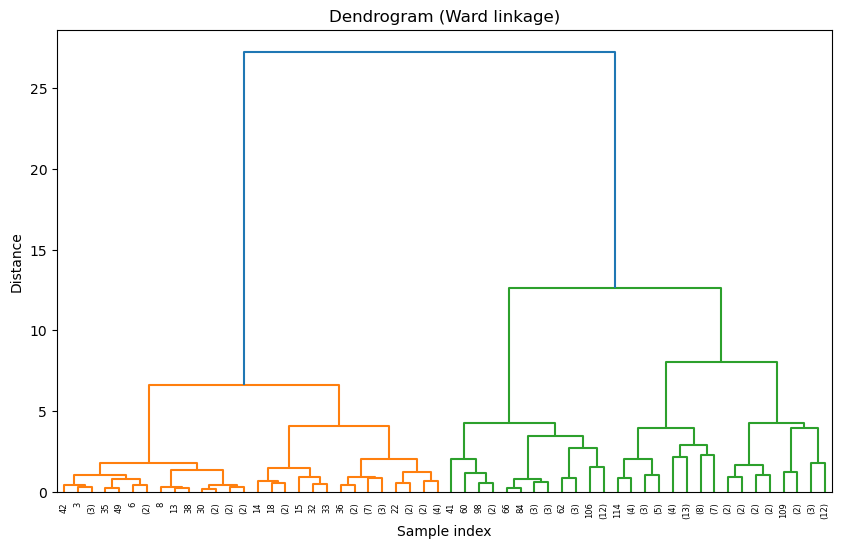

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(iris_scaled_df, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram (Ward linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

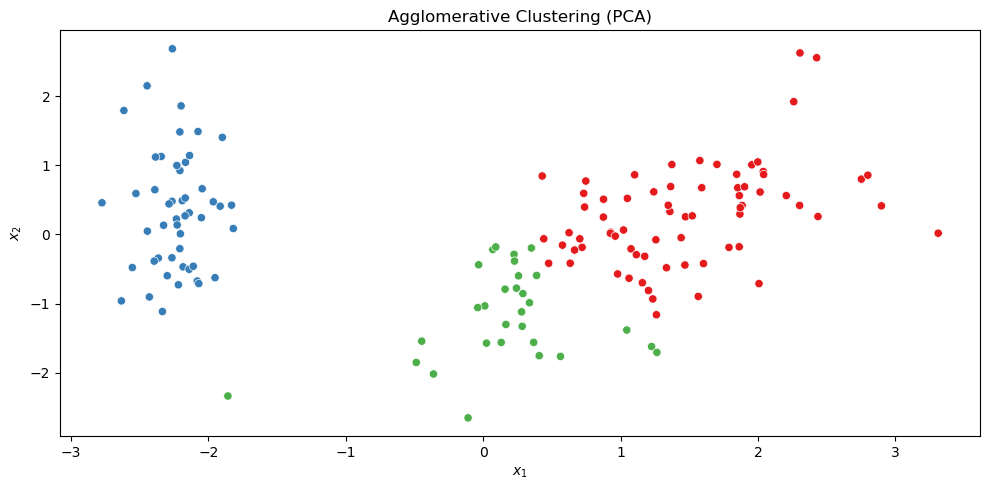

In [20]:
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(iris_scaled_df)
name = "Agglomerative Clustering"

fig, ax = plt.subplots(figsize=(10, 5))  

sns.scatterplot(
    x=iris_pca[:, 0], y=iris_pca[:, 1],
    hue=labels, palette="Set1", ax=ax, legend=(name == "Ground Truth")
)

ax.set_title(f"{name} (PCA)")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.tight_layout()
plt.show()

## 5 - How to evaluate clustering performance

### Elbow Method

The **Elbow Method** is a popular technique used to determine the optimal number of clusters ($k$) when applying clustering algorithms like KMeans. It is based on the concept of **inertia**, which measures how internally coherent the clusters are.

Inertia is defined as the **sum of squared distances** between each data point and the centroid of the cluster it belongs to:

$$
\text{Inertia} = \sum_{i=1}^{k} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2
$$

Where:
- $k$ is the number of clusters,
- $C_i$ is the set of points assigned to cluster $i$,
- $\mu_i$ is the centroid of cluster $i$,
- $x_j$ is a point belonging to cluster $i$.

Lower inertia values indicate more compact clusters. The procedure consists in:
- Running the clustering algorithm for different values of $k$ (e.g., from 1 to 10),
- Computing the corresponding inertia for each $k$,
- Plotting the values to visualize the trend.

The graph typically shows a steep drop in inertia as $k$ increases, followed by a slower decline. The "elbow" point - where the rate of decrease sharply changes - is considered a good estimate of the optimal number of clusters, as adding more clusters beyond this point yields little gain in compactness.


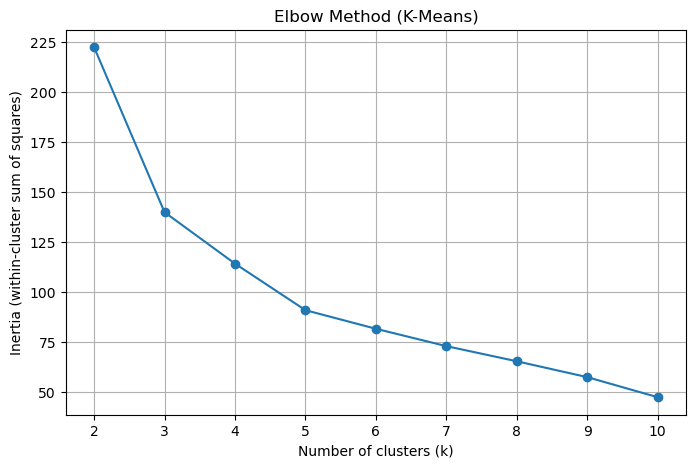

In [21]:
from sklearn.metrics import silhouette_score

# Range of k values to try
k_range = range(2, 11)

inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(iris_scaled_df)
    
    inertia.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

plt.figure(figsize=(8, 5))

plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method (K-Means)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.grid(True)

Which one do you think could be a feasible elbow point for the Iris dataset? Why? 

### Silhouette Score

The **Silhouette Score** is another metric that helps evaluate the quality of clustering. It combines both **cohesion** (how close the data points are within the same cluster) and **separation** (how far they are from points in other clusters). The silhouette score for a single data point is defined as:

$$
s = \frac{b - a}{\max(a, b)}
$$

Where:
- $a$ is the average distance to all other points in the same cluster,
- $b$ is the average distance to all points in the nearest different cluster.

The silhouette score ranges between **-1 and 1**:
- Values close to **1** indicate well-separated clusters,
- Values around **0** suggest overlapping clusters,
- Negative values imply possible misclassification.

To determine the optimal number of clusters, we compute the **average silhouette score** for different values of $k$ and select the one that maximizes it. This gives a reliable indication of how well the data has been grouped into clusters.

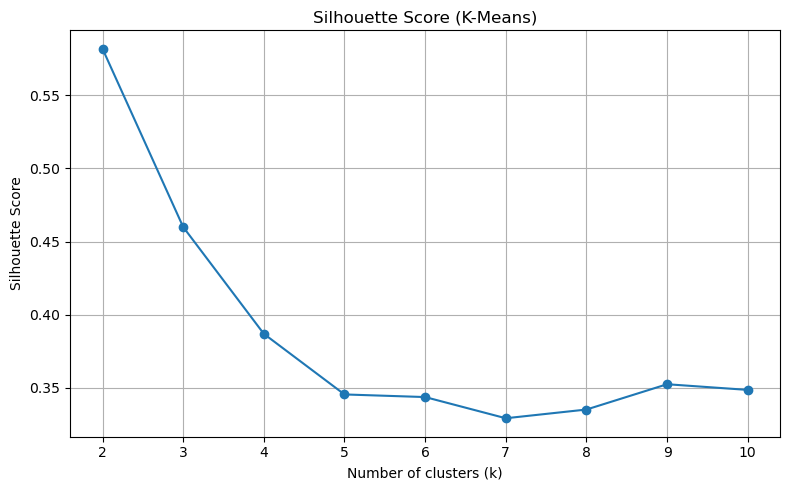

In [22]:
k_range = range(2, 11)

silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(iris_scaled_df)
    
    silhouette_scores.append(silhouette_score(iris_scaled_df, labels))

plt.figure(figsize=(8, 5))

plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Score (K-Means)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()


### Rand Index (RI)

The **Rand Index** is an external clustering validation metric used to compare the similarity between two data clusterings: the predicted clustering (e.g., from KMeans or DBSCAN) and the ground-truth classification (if available).

It is based on the idea of **pairwise agreement**: for every possible pair of data points, we check whether the two clusterings agree on whether the points belong to the same cluster or not.

Given:
- A dataset of \( n \) elements,
- Two clusterings: the **true labels** and the **predicted labels**,

We consider all \( \binom{n}{2} \) possible pairs of points and count:

- **a**: number of pairs that are **in the same cluster** in both labelings,
- **b**: number of pairs that are **in different clusters** in both labelings.

The **Rand Index** is then defined as:

$$
\text{RI} = \frac{a + b}{\binom{n}{2}}
$$

This represents the **proportion of pairwise decisions that are correct**.

<p align="center">
  <img src="./images/rand_index.png" alt="randindex" />
</p>

The rand index score ranges between **0 and 1**:
  - \( 1 \) → perfect match between the two clusterings,
  - \( 0 \) → completely different clustering structures.
- The Rand Index is **symmetric**: switching the roles of the true and predicted labels gives the same result.

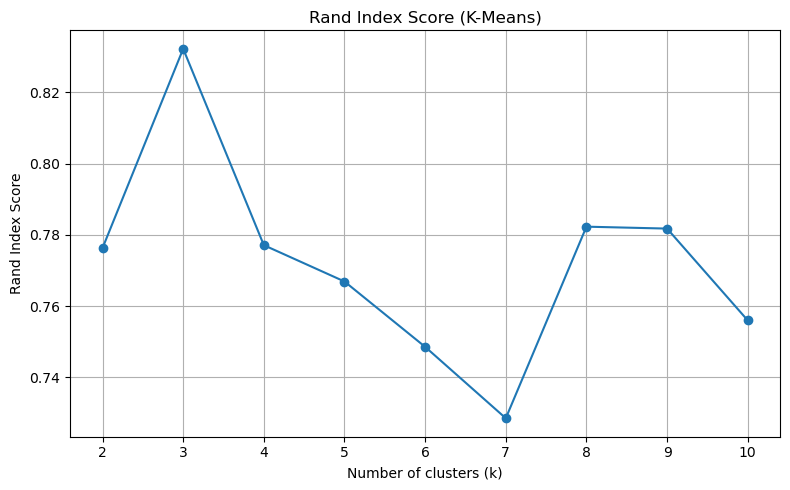

In [24]:
from sklearn.metrics import rand_score

k_range = range(2, 11)

ri_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(iris_scaled_df)

    rand_index = rand_score(iris.target, labels)
    
    ri_scores.append(rand_score(iris.target, labels))

plt.figure(figsize=(8, 5))

plt.plot(k_range, ri_scores, marker='o')
plt.title("Rand Index Score (K-Means)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Rand Index Score")
plt.grid(True)

plt.tight_layout()
plt.show()


### Adjusted Rand Index (ARI)

The **Adjusted Rand Index (ARI)** is an external evaluation metric for clustering that improves upon the **Rand Index (RI)** by correcting for chance. It compares the similarity between two clusterings.

In fact, in Rand Index even random clusterings can achieve a high score, especially with imbalanced clusters or many data points.

To solve this, the **Adjusted Rand Index** subtracts the expected RI of random labelings and normalizes the result, providing a more reliable measure of clustering quality.

Given:
- \( a \): number of pairs correctly clustered together,
- \( b \): number of pairs correctly not clustered together,
- \( n \): total number of data points,

Then:

$$
\text{ARI} = \frac{\text{RI} - \mathbb{E}[\text{RI}]}{\max(\text{RI}) - \mathbb{E}[\text{RI}]}
$$

Where:
- $ \text{RI} $ is the Rand Index,
- $ \mathbb{E}[\text{RI}] $ is the expected value of RI under random labelings.

The adjusted rand index score ranges between **-1 and 1**:
  - **1** → perfect agreement between clusterings,
  - **0** → random clustering (as expected by chance),
  - **< 0** → worse than random.


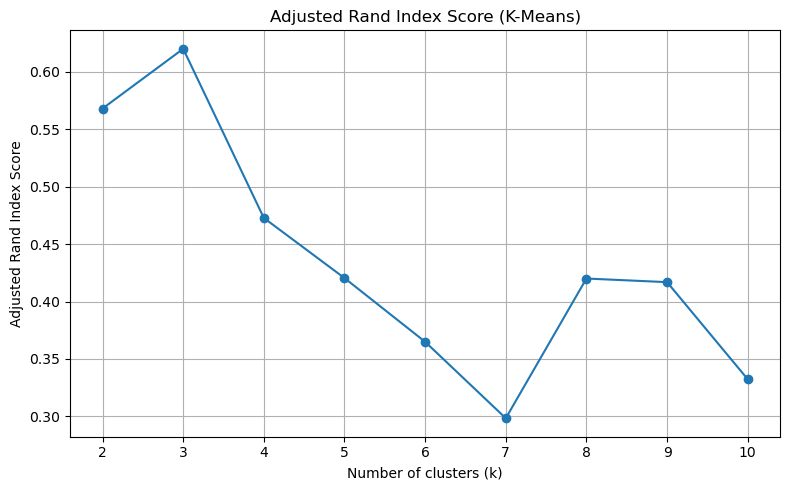

In [26]:
from sklearn.metrics import adjusted_rand_score

k_range = range(2, 11)

ri_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(iris_scaled_df)

    rand_index = adjusted_rand_score(iris.target, labels)
    
    ri_scores.append(adjusted_rand_score(iris.target, labels))

plt.figure(figsize=(8, 5))

plt.plot(k_range, ri_scores, marker='o')
plt.title("Adjusted Rand Index Score (K-Means)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Adjusted Rand Index Score")
plt.grid(True)

plt.tight_layout()
plt.show()


### Davies–Bouldin Index (DBI)

The **Davies–Bouldin Index (DBI)** is an **internal evaluation metric** used to assess the quality of clustering **without requiring ground-truth labels**. It evaluates how well the clusters are **separated** and how **compact** they are.

The ideal clustering should satisfy two conditions:
1. **Low intra-cluster distance** → points in the same cluster should be close to each other (compact clusters).
2. **High inter-cluster distance** → clusters should be far apart from each other (well separated).

The Davies–Bouldin Index combines these two ideas into a single metric by computing, for each cluster, its similarity with the most similar (i.e., closest) other cluster.

Given: 
- $\sigma_i$: average distance of points in cluster $i$ to the centroid of cluster $i$,
- $d(c_i, c_j)$: distance between centroids of clusters $i$ and $j$,

Then the similarity between clusters $i$ and $j$ is defined as:

$$
R_{ij} = \frac{\sigma_i + \sigma_j}{d(c_i, c_j)}
$$

The **Davies–Bouldin Index** is then:

$$
\text{DBI} = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} R_{ij}
$$

Where:
- $k$ is the number of clusters,
- For each cluster $i$, we compute its worst-case similarity $R_{ij}$ with any other cluster $j$,
- The final DBI is the average of these worst-case values across all clusters.


The Davies–Bouldin Index score ranges between **0 and +inf**:
- A **low DBI** indicates that clusters are compact and well-separated

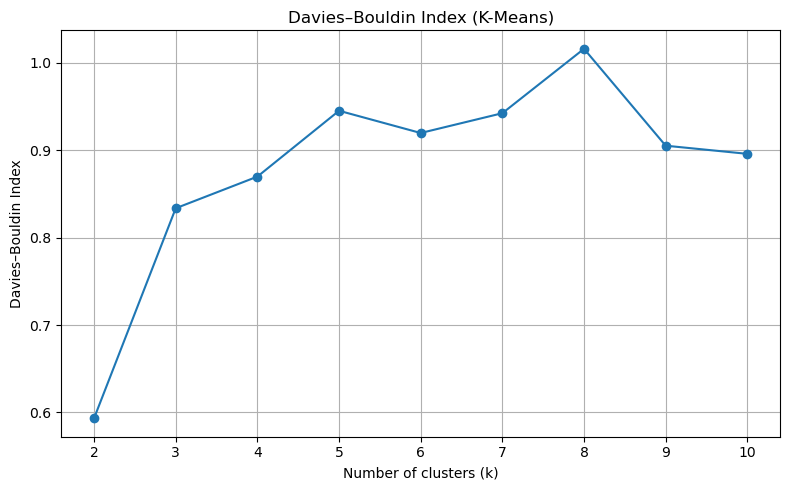

In [27]:
from sklearn.metrics import davies_bouldin_score

k_range = range(2, 11)

dbi_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(iris_scaled_df)

    dbi = davies_bouldin_score(iris_scaled_df, labels)
    dbi_scores.append(dbi)

plt.figure(figsize=(8, 5))

plt.plot(k_range, dbi_scores, marker='o')
plt.title("Davies–Bouldin Index (K-Means)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies–Bouldin Index")
plt.grid(True)

plt.tight_layout()
plt.show()


### 💡 ***Exercise: Let's apply what we learned until now to evaluate a clustering method!***

In [33]:
# Fit clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(iris_scaled_df)

dbs = DBSCAN(eps=0.7, min_samples=5)
dbs_labels = dbs.fit_predict(iris_scaled_df)

agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(iris_scaled_df)

# Dictionary of clustering results
clustering_results = {
    "K-Means": kmeans_labels,
    "DBSCAN": dbs_labels,
    "Agglomerative": agg_labels,
}

# Initialize metrics list
metrics = []

# Compute metrics for each method
for name, labels in clustering_results.items():
    # Mask out noise points (-1) for DBSCAN
    mask = labels != -1 if name == "DBSCAN" else slice(None)

    # Avoid computing scores on invalid clusterings
    n_clusters = len(set(labels[mask]))
    if n_clusters > 1:
        sil_score = silhouette_score(iris_scaled_df[mask], labels[mask])
        db_index = davies_bouldin_score(iris_scaled_df[mask], labels[mask])
    else:
        sil_score = np.nan
        db_index = np.nan

    ari = adjusted_rand_score(iris.target, labels)
    ri = rand_score(iris.target, labels)

    metrics.append({
        "Algorithm": name,
        "Silhouette Score": sil_score,
        "Davies–Bouldin Index": db_index,
        "Rand Index": ri,
        "Adjusted Rand Index": ari,
    })

# Create DataFrame with all metrics
df_metrics = pd.DataFrame(metrics)
df_metrics


,Algorithm,Silhouette Score,Davies–Bouldin Index,Rand Index,Adjusted Rand Index
0,K-Means,0.459948,0.833595,0.832215,0.620135
1,DBSCAN,0.601795,0.556837,0.768412,0.540077
2,Agglomerative,0.446689,0.803467,0.825235,0.615323


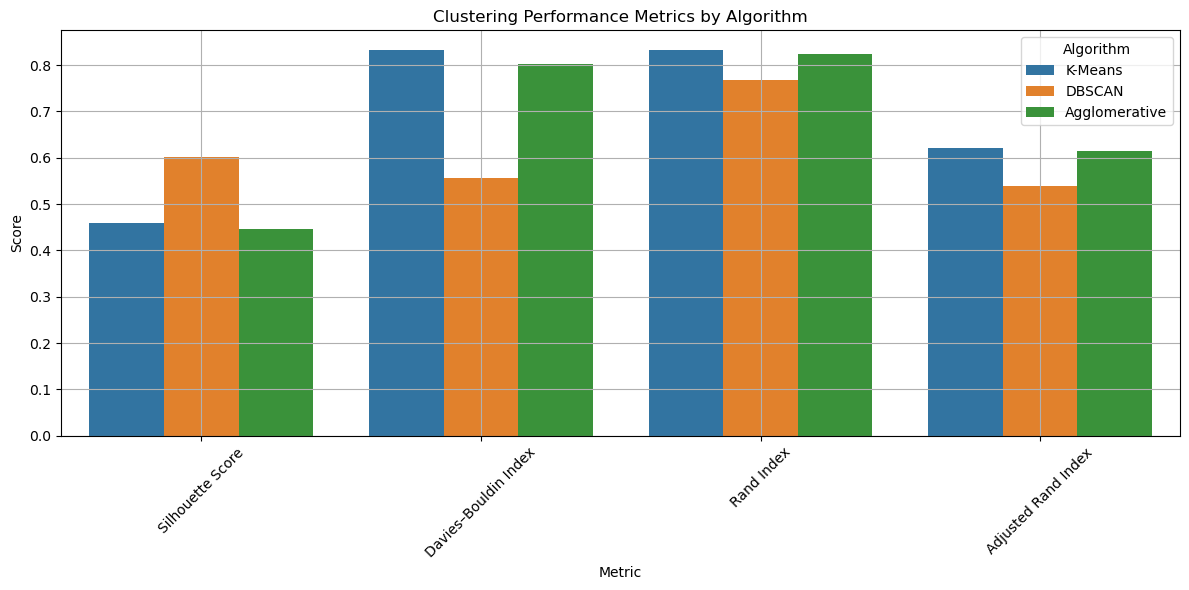

In [34]:
df_melted = df_metrics.melt(id_vars="Algorithm", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Metric", y="Score", hue="Algorithm")
plt.title("Clustering Performance Metrics by Algorithm")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()